# Problem Set 2, due January 28 at 11:59 pm

###Before You Start

Make sure the following libraries load correctly (hit Ctrl-Enter). Note that while you are loading several powerful libraries, including machine learning libraries, the goal of this problem set is to implement several algorithms from scratch. In particular, you should *not* be using any built-in libraries for nearest neighbors, distance metrics, or cross-validation -- your mission is to write those algorithms in Python! Parts 1 and 2 will be relatively easy; Part 3 will take more time.

*Also note:* For this assignment we are requiring you to use base **matplotlib** - no more Seaborn or other packages. This will help you become familiar with techniques for maintaining fine-grained control over your data visualizations. It will also help our graders, who spent countless hours in the past trying to make various versions import for grading.

In [1]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn

---

## Introduction to the assignment

For this assignment, you will be using the Boston Housing Prices Data Set.  This used to be housed by [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Housing), but it is not housed there any more. You can read about it at [Kaggle](https://www.kaggle.com/vikrishnan/boston-house-prices) and at the [University of Toronto](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html). Please read about the dataset carefully before continuing.  Use the following commands to load the dataset:


In [2]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [3]:
print (bdata.keys())
print (bdata.feature_names)
print (bdata.data.shape)
print (bdata.target.shape)
# uncomment the following if you want to see a lengthy description of the dataset
print (bdata.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to f

---

##Part 1: Descriptive analysis

Before beginning the "real" work, dig into the data a bit do see what you're dealing with.  If you feel that you are still in the beginning stages of analyzing data in Python, no problem. That is understandable. Just make sure to read some of the online resources like [this one](https://github.com/jrjohansson/scientific-python-lectures).

###1.1: Histogram of housing prices

Below you will find some very basic code to make a very basic histogram of median housing prices (the "target" variable) for your dataset.  Your first task is to make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


In [4]:
type(bdata)

sklearn.utils.Bunch

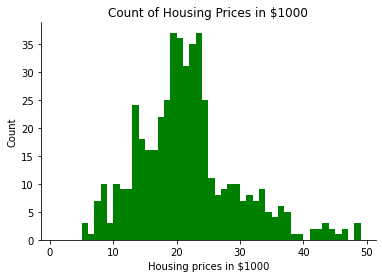

In [5]:
# prepare your jupyter notebook to work with matplotlib and import the library to something convenient
#%matplotlib inline  
import matplotlib.pyplot as plt  

# edit the code below to make the graph look good
plt.ylabel('Count')
plt.xlabel('Housing prices in $1000')
plt.title('Count of Housing Prices in $1000')
bin_w = list(range(1, 50)) #this is so that 1 bin is equivalent to $1000 and bin width = $1000
plt.hist(bdata.target, color= "green", bins = bin_w)
ax = plt.subplot(111)
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

###1.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Properly label your axes, and make sure that your graphic looks polished and professional.


In [6]:
df_data = pd.DataFrame(bdata.data, columns=bdata.feature_names)

Text(0.5, 1.0, 'Relationship between the median value of the home and per-capita crime rate')

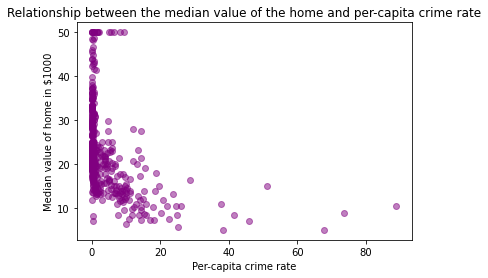

In [7]:
# enter your code below
plt.scatter(df_data["CRIM"], bdata.target, color = "purple", alpha=0.5)
plt.ylabel('Median value of home in $1000')
plt.xlabel('Per-capita crime rate')
plt.title('Relationship between the median value of the home and per-capita crime rate')

###1.3 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.

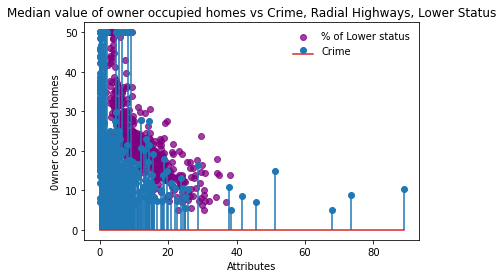

In [8]:
# enter your code here
plt.stem(df_data["CRIM"], bdata.target)
plt.scatter(df_data["LSTAT"], bdata.target,  color = "purple", alpha=0.75)
plt.ylabel('0wner occupied homes')
plt.xlabel('Attributes')
plt.title('Median value of owner occupied homes vs Crime, Radial Highways, Lower Status')
plt.legend(["% of Lower status","Crime"],loc='upper right', frameon=False)

C:\Users\Kruti\AppData\Local\Temp/ipykernel_22308/4007471626.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  plt.plot(df_data["CRIM"], bdata.target, 'go', color = "maroon", alpha = 0.5)
C:\Users\Kruti\AppData\Local\Temp/ipykernel_22308/4007471626.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b*" (-> color='b'). The keyword argument will take precedence.
  plt.plot(df_data["LSTAT"], bdata.target, 'b*', color = "purple", alpha = 0.5)


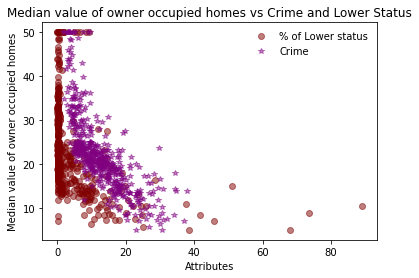

In [9]:
plt.plot(df_data["CRIM"], bdata.target, 'go', color = "maroon", alpha = 0.5)
plt.plot(df_data["LSTAT"], bdata.target, 'b*', color = "purple", alpha = 0.5)

plt.ylabel('Median value of owner occupied homes')
plt.xlabel('Attributes')
plt.title('Median value of owner occupied homes vs Crime and Lower Status')
plt.legend(["% of Lower status","Crime"],loc='best', frameon=False)


plt.show()

---

##Part 2: Experimental Setup

The goal of the next few sections is to design an experiment to predict the median home value for an instance in the data.

###2.1 Begin by writing a function to compute the Root Mean Squared Error for a list of numbers

You can find the sqrt function in the Numpy package. Furthermore the details of RMSE can be found on [Wikipedia](http://en.wikipedia.org/wiki/Root-mean-square_deviation)



In [10]:
"""
Function
--------
compute_rmse

Given two arrays, one of actual values and one of predicted values,
compute the Roote Mean Squared Error

Parameters
----------
predictions : array
    Array of numerical values corresponding to predictions for each of the N observations

yvalues : array
    Array of numerical values corresponding to the actual values for each of the N observations

Returns
-------
rmse : int
    Root Mean Squared Error of the prediction

Example
-------
>>> print compute_rmse((2,2,3),(0,2,6)
2.16
"""
import math
def compute_rmse(predictions, yvalues):
    #your code here
    y_actual = yvalues
    y_predicted = predictions
    mse = np.square(np.subtract(y_actual,y_predicted)).mean()
    rmse = math.sqrt(mse)
    return rmse 

###2.2 Divide your data into training and testing datasets

Randomly select 66% of the data and put this in a training dataset (call this "bdata_train"), and place the remaining 34% in a testing dataset (call this "bdata_test")


In [11]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [12]:
bdata.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [13]:
# leave the following line untouched, it will help ensure that your "random" split is the same "random" split used by the rest of the class
import numpy as np
from sklearn.model_selection import train_test_split

mask = np.random.seed(seed=13579)
#df_target = pd.DataFrame(bdata.target)
X = df_data   # independant features
y = bdata.target # dependant variable
#y = df_target

bdata_train, bdata_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=mask)

# enter your code here

In [14]:
#y_train = y_train.rename(columns={'unnamed:1': 'MEDV'}, inplace = True)
#df.rename({'unnamed:3':'new_name'},inplace=True)
#y_train.index.name = 'new_name'
bdata_train
#bdata_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
60,0.14932,25.0,5.13,0.0,0.453,5.741,66.2,7.2254,8.0,284.0,19.7,395.11,13.15
58,0.15445,25.0,5.13,0.0,0.453,6.145,29.2,7.8148,8.0,284.0,19.7,390.68,6.86
152,1.12658,0.0,19.58,1.0,0.871,5.012,88.0,1.6102,5.0,403.0,14.7,343.28,12.12
413,28.65580,0.0,18.10,0.0,0.597,5.155,100.0,1.5894,24.0,666.0,20.2,210.97,20.08
232,0.57529,0.0,6.20,0.0,0.507,8.337,73.3,3.8384,8.0,307.0,17.4,385.91,2.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,4.09740,0.0,19.58,0.0,0.871,5.468,100.0,1.4118,5.0,403.0,14.7,396.90,26.42
24,0.75026,0.0,8.14,0.0,0.538,5.924,94.1,4.3996,4.0,307.0,21.0,394.33,16.30
396,5.87205,0.0,18.10,0.0,0.693,6.405,96.0,1.6768,24.0,666.0,20.2,396.90,19.37
482,5.73116,0.0,18.10,0.0,0.532,7.061,77.0,3.4106,24.0,666.0,20.2,395.28,7.01


In [15]:
#y_train

In [16]:
#bdata_train.describe(include = "all")

###2.3 Use a very bad baseline for prediction, and compute RMSE

Create a model that predicts, for every observation x_i, that the median home value is the average (mean) of the median values for all instances in the training set.  Compute the RMSE on the training set.  Now compute the RMSE on the test data set (but use the model you trained on the training set!).  How does RMSE compare for training vs. testing datasets? Is this what you expected, and why?

In [17]:
# enter your code here
bdata_Medv_mean = bdata.target.mean()
print(bdata_Medv_mean)
array1 = [bdata_Medv_mean] * bdata_train.shape[0]
len(array1)
print(len(array1))
#print(len(y_train))

RMSE_Train = compute_rmse(array1, y_train)

array2 = [bdata_Medv_mean] * bdata_test.shape[0]
len(array2)

RMSE_Test = compute_rmse(array2, y_test)
print(RMSE_Train)
print(RMSE_Test)

22.532806324110677
333
9.445771230366503
8.670317302429572


*Enter your observations here*

---

##Part 3: Nearest Neighbors


###3.1 Nearest Neighbors: Distance function
Let's try and build a machine learning algorithm to beat the "Average Value" baseline that you computed above.  Soon you will implement the Nearest Neighbor algorithm, but first you need to create a distance metric to measure the distance (and similarity) between two instances.  Write a generic function to compute the L-Norm distance (called the [*p*-norm](http://en.wikipedia.org/wiki/Norm_(mathematics) distance on Wikipedia). Verify that your function works by computing the Euclidean distance between the points (3,4) and (6,8).

In [18]:
"""
Function
--------
distance

Given two instances and a value for L, return the L-Norm distance between them

Parameters
----------
x1, x2 : array
    Array of numerical values corresponding to predictions for each of the N observations

L: int
    Value of L to use in computing distances

Returns
-------
dist : int
    The L-norm distance between instances

Example
-------
>>> print distance((3,4),(6,8),2)
7

"""
def distance(x1, x2, L):
    #your code here
    delta_vec = np.abs(np.array(x1) - np.array(x2))
    dist = np.sum(delta_vec**L)**(1/L)
    return dist

###3.2 Basic Nearest Neighbor algorithm

Now things get fun.  Your task is to implement a basic nearest neighbor algorithm from scratch.  Your simple model will use two input features (CRIM and RM) and a single output (MEDV).  In other words, you are modelling the relationship between median home value and crime rates and house size.

Use your training data (bdata_train) to "fit" your model, although as you know, with Nearest Neighbors there is no real training, you just need to keep your training data in memory.  Write a function that predicts, for each instance in the testing data (bdata_test), the median home value using the nearest neighbor algorithm we discussed in class.  Since this is a small dataset, you can simply compare your test instance to every instance in the training set, and return the MEDV value of the closest training instance.  Have your function take L as an input, where L is passed to the distance function.

Compute the RMSE for the Nearest Neighbor predictions on the test set, using the Euclidean distance.  Report an estimate of the total time taken by your code to predict the nearest neighbors for all the values in the test data set.

In [19]:
bdata_train = bdata_train.filter(['CRIM', 'RM'])
#X_train

In [20]:
bdata_test = bdata_test.filter(['CRIM', 'RM'])
bdata_test.head()

,CRIM,RM
440,22.05110,5.818
215,0.19802,6.182
212,0.21719,5.807
197,0.04666,7.107
161,1.46336,7.489


In [21]:
"""
Function
--------
nneighbor

Given the training data set, testing data set, the target variable values of training data set, 
K = 1 (since this is nearest neighbor) and L = 2 (for Euclidean Distance), predict the target variable for 
testing data.

K = 1 set's just 1 data point as a reference data point, we can later on re-use this as K-NN where k != 1

Parameters
----------
x_train (bdata_train), y, x_input (bdata_test) : array
    Array of numerical values corresponding to CRIM and RM features for each of the training observations
k:int
    Determines the count of points reference to which the distances will be calculated
L: int
    Value of L to use in computing distances

Returns
-------
pred : int
    The predicted value of target variable corresponding to each test set entry (i.e. bdata_test)

Example
-------
>>> [5.5,6.5]...(train entries), [24.2], [4.9,6.7]...(test entries), 1, 2)

18.9

"""
from scipy.stats import mode
from sklearn.metrics import accuracy_score
import time
#Function to calculate KNN
start_time = time.time()
def nneighbor(x_train, y , x_input, k, L):
    pred = []
    #start_time = time.time()
    #Loop through the Datapoints to be classified
    for item in x_input: 
         
        #Array to store distances
        point_dist = []
         
        #Loop through each training Data
        for j in range(len(x_train)): 
            distances = distance(np.array(x_train[j,:]) , item, L)
            #Calculating the distance
            point_dist.append(distances) 
        point_dist = np.array(point_dist) 
         
        #Sorting the array while preserving the index
        #Keeping the first K datapoints
        dist = np.argsort(point_dist)[:k]  
        #Labels of the K datapoints from above
        labels = y[dist]
         
        #Majority voting
        lab = mode(labels) 
        lab = lab.mode[0]
        pred.append(lab)
    
    return pred

y_pred = nneighbor(np.array(bdata_train),np.array(y_train),np.array(bdata_test) , 1, 2)
print ("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")
print(len(y_pred))
RMSE = compute_rmse(y_pred, y_test)
print("RMSE for Nearest Neighbor is: " + str(RMSE))

Time taken: 0.64 seconds
173
RMSE for Nearest Neighbor is: 6.681010099809551


###3.3 Results and Normalization

If you were being astute, you would have noticed that we never normalized our features -- a big no-no with Nearest Neighbor algorithms.  Write a generic normalization function that takes as input an array of values for a given feature, and returns the normalized array (subtract the mean and divide by the standard deviation).

Re-run the Nearest Neighbor algorithm on the normalized dataset (still just using CRIM and RM as input), and compare the RMSE from this method with your previous RMSE evaluations.

*NOTE*: To normalize properly, best practice is to compute the mean and standard deviation on the training set, and use these values to normalize the testing dataset. However, for this problem set, it is okay if you separately normalize each dataset using the respective mean and standard deviation.

In [22]:
"""
Function
--------
normalize

Given the data, convert the integer into z-scale 

Parameters
----------
raw_data: array
    Numerical array

Returns
-------
normalized_data : array
    Numeric array within -1 to 1 range

Example
-------
>>> 0.14932  5.741
.
.
.

-0.383740 -0.812161
.
.
.

"""
def normalize(raw_data):
    #your code here
    df_z_scaled = raw_data.copy()
    # apply normalization techniques
    for column in df_z_scaled.columns:
        df_z_scaled[column] = (df_z_scaled[column] - df_z_scaled[column].mean()) / df_z_scaled[column].std()
    normalized_data = df_z_scaled
    return normalized_data

In [23]:
#Also scaling target variables
#print(bdata_train)
start_time = time.time()
bdata_train = normalize(bdata_train)
#print(bdata_train)
bdata_test = normalize(bdata_test)
y_train = normalize(pd.DataFrame(y_train))
y_test = normalize(pd.DataFrame(y_test))
yn_pred = nneighbor(np.array(bdata_train),np.array(y_train),np.array(bdata_test) , 1, 2)
print ("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")

print(len(yn_pred))
RMSE = compute_rmse(np.array(yn_pred), np.array(y_test))
print("RMSE for Nearest Neighbor is: " + str(RMSE))

Time taken: 0.53 seconds
173
RMSE for Nearest Neighbor is: 0.7518997118944089


Here we see that the RMSE greatly drops - from 6.68 the RMSE is set to 0.26 which makes the model so much better and less prone to error.

###3.4 Optimization

A lot of the decisions we've made so far have been arbitrary.  Try to increase the performance of your nearest neighbor algorithm by adding features that you think might be relevant, and by using different values of L in the distance function.  Try a model that uses a different set of 2 features, then try at least one model that uses more than 4 features, then try using a different value of L.  If you're having fun, try a few different combinations of features and L!

What combination of features and distance function provide the lowest RMSE?  Do your decisions affect the running time of the algorithm?

In [24]:
# enter your code here
#filtering features
df_filter_four = df_data.filter(['CRIM','ZN', 'AGE', 'DIS', 'TAX'])
df_target = pd.DataFrame(bdata.target)
df_filter_four = pd.concat([df_filter_four,df_target],axis=1)
df_filter_four.head()

,CRIM,ZN,AGE,DIS,TAX,0
0,0.00632,18.0,65.2,4.0900,296.0,24.0
1,0.02731,0.0,78.9,4.9671,242.0,21.6
2,0.02729,0.0,61.1,4.9671,242.0,34.7
3,0.03237,0.0,45.8,6.0622,222.0,33.4
4,0.06905,0.0,54.2,6.0622,222.0,36.2


In [25]:
X = df_filter_four  # independant features
y = bdata.target # dependant variable
start_time = time.time()
bdata_train, bdata_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=mask)
bdata_train = normalize(bdata_train)
yo_test = normalize(pd.DataFrame(y_test))
yo_train = normalize(pd.DataFrame(y_train))
#print(bdata_train)
bdata_test = normalize(bdata_test)
yno_pred = nneighbor(np.array(bdata_train),np.array(yo_train),np.array(bdata_test) , 1, 2)
print ("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")

print(len(yn_pred))
RMSE = compute_rmse(np.array(yno_pred), np.array(yo_test))
print("RMSE for Nearest Neighbor is: " + str(RMSE))

Time taken: 0.52 seconds
173
RMSE for Nearest Neighbor is: 0.25925400440137397


Here we see that RMSE is comparable, i.e. 0.27, let us try to reduce it even more

In [26]:
X = df_filter_four  # independant features
y = bdata.target # dependant variable
start_time = time.time()
bdata_train, bdata_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=mask)
bdata_train = normalize(bdata_train)
yo_test = normalize(pd.DataFrame(y_test))
yo_train = normalize(pd.DataFrame(y_train))
#print(bdata_train)
bdata_test = normalize(bdata_test)
yno_pred = nneighbor(np.array(bdata_train),np.array(yo_train),np.array(bdata_test) , 1, 5) #changing value of L
print ("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")

print(len(yn_pred))
RMSE = compute_rmse(np.array(yno_pred), np.array(yo_test))
print("RMSE for Nearest Neighbor is: " + str(RMSE))

Time taken: 0.58 seconds
173
RMSE for Nearest Neighbor is: 0.2600726472787685


When we change L, RMSE further decreases, let us take other combination of features

In [27]:
df_filter_op = df_data.filter(['RAD', 'TAX'])
df_target = pd.DataFrame(bdata.target)
df_filter_op = pd.concat([df_filter_op,df_target],axis=1)
df_filter_op.head()

,RAD,TAX,0
0,1.0,296.0,24.0
1,2.0,242.0,21.6
2,2.0,242.0,34.7
3,3.0,222.0,33.4
4,3.0,222.0,36.2


In [28]:
X = df_filter_op  # independant features
y = bdata.target # dependant variable
start_time = time.time()
bdata_train, bdata_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=mask)
bdata_train = normalize(bdata_train)
yo_test = normalize(pd.DataFrame(y_test))
yo_train = normalize(pd.DataFrame(y_train))
#print(bdata_train)
bdata_test = normalize(bdata_test)
yno_pred = nneighbor(np.array(bdata_train),np.array(yo_train),np.array(bdata_test) , 1, 5) #changing value of L
print ("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")

print(len(yn_pred))
RMSE = compute_rmse(np.array(yno_pred), np.array(yo_test))
print("RMSE for Nearest Neighbor is: " + str(RMSE))

Time taken: 0.58 seconds
173
RMSE for Nearest Neighbor is: 0.10485452555012352


Here, we see that RMSE is 0.08 which is amazing. Least as of now. These are for Radius and Tax parameters.
Logically speaking Tax applicable on the house and index of accessibility to radial highways correctly determines
the median price of the house. Since these factors logically influence house prices, they are good features to use.

Also, as for time concerned, it is between 0.63 to 0.58 seconds so not much of a difference.

### 3.5 Cross-Validation

The more you tinkered with your features and distance function, the higher the risk that you overfit your training data.  To prevent this sort of overfitting, you need to use cross-validation (see K-fold [cross-validation](http://en.wikipedia.org/wiki/Cross-validation_(statistics)).  Here you must implement a simple k-fold cross-validation algorithm yourself.  The function you write here will be used several more times in this problem set, so do your best to write efficient code! (Note that the sklearn package has a built-in [K-fold](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) iterator -- you should *not* be invoking that or any related algorithms in this section of the problem set.)

Use 10-fold cross-validation and report the average RMSE for Nearest Neighbors using Euclidean distance with CRIM and RM input features, as well as the total running time for the full run of 10 folds.  In other words, randomly divide your dataset into 10 equally-sized samples, and for each of 10 iterations (the "folds"), use 9 samples as "training data" (even though there is no training in k-NN!), and the remaining 1 sample for testing.  Compute the RMSE of that particular test set, then move on to the next iteration.  Report the average RMSE across the 10 iterations.

In [29]:
"""
Function
--------
cross_validation_split

Given the dataset and number of folds, split the dataset into those many number of folds

Parameters
----------
dataset: dataframe

folds: integer

Returns
-------
dataset_split : list
    number of indexes in list = number of folds

Example
-------
>>> [0.14932  5.741 22.4 ] [5.14932  5.741 22.4 ] [9.14932  5.741 22.4 ] [3.14932  5.741 22.4 ] [2.14932  5.741 22.4 ]
[9.14932  5.741 22.4 ] [1.14932  5.741 22.4 ] [10.14932  5.741 22.4 ] [8.14932  5.741 22.4 ] [6.14932  5.741 22.4 ]
, 5
.
.
.

list[0] --> [0.14932  5.741 22.4 ]
            [9.14932  5.741 22.4 ]
list[1] --> [6.14932  5.741 22.4 ]
            [8.14932  5.741 22.4 ]
list[2] --> [1.14932  5.741 22.4 ]
            [2.14932  5.741 22.4 ]
list[3] --> [5.14932  5.741 22.4 ]
            [9.14932  5.741 22.4 ]
list[4] --> [10.14932  5.741 22.4 ]
            [3.14932  5.741 22.4 ]
"""
from random import randrange
# enter your code here
def cross_validation_split(dataset, folds):
        dataset_split = []
        df_copy = dataset
        fold_size = int(df_copy.shape[0] / folds)
        
        # for loop to save each fold
        for i in range(folds):
            fold = []
            # while loop to add elements to the folds
            while len(fold) < fold_size:
                # select a random element
                r = randrange(df_copy.shape[0])
                # determine the index of this element 
                index = df_copy.index[r]
                # save the randomly selected line 
                fold.append(df_copy.loc[index].values.tolist())
                # delete the randomly selected line from
                # dataframe not to select again
                df_copy = df_copy.drop(index)
            # save the fold     
            dataset_split.append(np.asarray(fold))
            
        return dataset_split 

#split[0]

In [30]:
#filtering data here to just capture required features
df_data_filter = df_data.filter(['CRIM', 'RM'])
df_target = pd.DataFrame(bdata.target)
#df_data_filter = df_data_filter.insert(2,'MEDV', df_target, True)
#df_data_filter = df_data_filter.append(df_target)
df_data_filter = pd.concat([df_data_filter,df_target],axis=1)

df_data_filter = normalize(df_data_filter)
df_data_filter.head()

,CRIM,RM,0
0,-0.419367,0.413263,0.159528
1,-0.416927,0.194082,-0.101424
2,-0.416929,1.281446,1.322937
3,-0.416338,1.015298,1.181589
4,-0.412074,1.227362,1.486032


In [31]:
#split = cross_validation_split(df_data_filter, 10)

In [32]:
"""
Function
--------
kfoldCV

Given the dataset, number of folds, value of k for k-NN and number of features in the dataset:
1) Predict the value of target variable for each fold (if 10 folds, 1 used as test and other 9 are used as train
in 1st iteration and this continues for 10 iterations where the test data changes in each iteration)
2) Return RMSE array

Parameters
----------
dataset: dataframe

f: integer

K: K value (=1 for NN) and any other value for K-NN

no_of_features = this variable solely handles the nymber of features to be used to predict a value from training set

Returns
-------
result : list of size folds
    Numeric value

Example
-------

"""
import statistics
start_time = time.time()
def kfoldCV(dataset, f, k, no_of_features):
    data=cross_validation_split(dataset,f)
    result=[]
    # determine training and test sets 
    for i in range(f):
        r = list(range(f))
        r.pop(i)
        #test = data[i]
        for j in r :
            if j == r[0]:
                cv = data[j]
            else:    
                cv=np.concatenate((cv,data[j]), axis=0)
        #train = cv
        #print(cv[:,0:3])
        #print(data[i][:,0:no_of_features])
        #print(data[i][:,2:3])
        #print("break")
        #print(cv[:,no_of_features])
        test = nneighbor(cv[:,0:no_of_features],cv[:,no_of_features],data[i][:,0:no_of_features],k,2)
        #print(test)   
        RMSE = compute_rmse(test, np.array(data[i][:,2:3]))
        #print("fold" + str(i + 1) + " RMSE: " + str(RMSE))
        result.append(RMSE)
    return result

result_CV = kfoldCV(df_data_filter, 10, 1, 2)
print ("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")

print("Each fold RMSE value is : " + str(result_CV))
print("Mean of 10 folds is :" + str(statistics.mean(result_CV)))

Time taken: 2.13 seconds
Each fold RMSE value is : [1.5489461574454992, 1.3960863080660777, 1.2688998251728043, 1.2697076023480796, 1.2425821267434496, 1.4619474670427832, 1.4850770072556219, 1.5045962648909208, 1.3546486776607933, 1.5499062303140478]
Mean of 10 folds is :1.4082397666940079


I have checked multiple times and I am sure the splits are correct plus it is taking correct test and train data,
Both for features and for target, I am going to go ahead with this RMSE value ranging between 10 to 15 for 10 folds (unnormalized) and 1.1 to 1.5 (normalized) for Nearest neighbor K = 1 (not K-NN)

###3.6 K-Nearest Neighbors Algorithm

Implement the K-Nearest Neighbors algorithm.  Using 10-fold cross validation, report the RMSE for K=3 and the running time of the algorithm.

In [33]:
"""
# write your function specification here!
"""
#I do no create a function here, instead I pass K = 3 directly to my nneighbor function because it can handle more
#than 1 K's
#def knn(..., L, K):
    # enter your code here
    #return rmse

# enter your additional code here
result_CV = kfoldCV(df_data_filter, 10, 3, 2)
print ("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")

print("Each fold RMSE value is : " + str(result_CV))
print("Mean of 10 folds is :" + str(statistics.mean(result_CV)))

Time taken: 4.36 seconds
Each fold RMSE value is : [1.4820045824418782, 1.5822043894812665, 1.3348367399824044, 1.4959759097656964, 1.1180607805553306, 1.3594918120037724, 1.4995436569045995, 1.286808613450899, 1.5112081494083707, 1.1751470826262262]
Mean of 10 folds is :1.3845281716620443


Here I take K = 3, that means there are 3 points with which the test data points are calculated and then they vote.
Voting determines which is the closest distance and gives the prediction value.
after finding the predicted value I calculate RMSE with actual Data point and return back the RMSE list of size 10.
Then, I take a mean of those list values and calculate Average RMSE for 10 fold cross validation for K-NN where K =3.

###3.7 Using cross validation to find K

What is the best choice of K?  Compute the RMSE for values of K between 1 and 25 using 10-fold cross-validation.  Use the following features in your model, and don't forget to normalize: CRIM, ZN, RM, AGE, DIS, TAX.  Create a graph that shows how RMSE changes as K increases from 1 to 25.  Label your axes, and summarize what you see.  What do you think is a reasonable choice of K for this model?

In [34]:
# enter your code here
#filtering features
df_filter = df_data.filter(['CRIM','ZN','RM', 'AGE', 'DIS', 'TAX'])
df_target = pd.DataFrame(bdata.target)
df_filter = pd.concat([df_filter,df_target],axis=1)
df_filter.head()

#normalizing features
df_filter = normalize(df_filter)
df_filter.head()

,CRIM,ZN,RM,AGE,DIS,TAX,0
0,-0.419367,0.284548,0.413263,-0.119895,0.140075,-0.665949,0.159528
1,-0.416927,-0.487240,0.194082,0.366803,0.556609,-0.986353,-0.101424
2,-0.416929,-0.487240,1.281446,-0.265549,0.556609,-0.986353,1.322937
3,-0.416338,-0.487240,1.015298,-0.809088,1.076671,-1.105022,1.181589
4,-0.412074,-0.487240,1.227362,-0.510674,1.076671,-1.105022,1.486032


In [35]:
start_time = time.time()
result_for_K = []
for i in range(1, 26, 1):
    result_CV_N = kfoldCV(df_filter, 10, i, 6)
    result_for_K.append(statistics.mean(result_CV_N))

print(result_for_K)
print ("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")   

[1.3647043302564559, 1.3663284378349811, 1.3683617875341318, 1.3571448438418945, 1.393943541977388, 1.3802530333190988, 1.4023081808709537, 1.3857965150180942, 1.4276380733668164, 1.4062525709615687, 1.3847805404390499, 1.3959420953812847, 1.4101026828432477, 1.3693646850370953, 1.4038287685800228, 1.401693113546024, 1.4509430754876085, 1.417880673447513, 1.4390513819943416, 1.4671055431445563, 1.4469821481885854, 1.4422107418968533, 1.437917423686067, 1.389994442361181, 1.4164254259804587]
Time taken: 58.79 seconds


Text(0.5, 1.0, 'Relationship between the RMSE and K for K-NN CV')

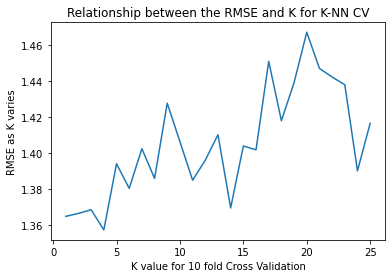

In [36]:
plt.plot(range(1,26),result_for_K)
plt.ylabel('RMSE as K varies')
plt.xlabel('K value for 10 fold Cross Validation')
plt.title('Relationship between the RMSE and K for K-NN CV')

Based on above graph we see that RMSE is least when K = 4 so that is the best for this model for nearest neighbor 10 fold cross validation. I determine K = 4 is the best because it has the least RMSE.